# Cel

 * Poprzedni eksperyment - Nasze dane balanced data
 * Inbalanced data
 * UnderSampling
 * OverSampling
    

# Imports + DataSource

In [1]:
import os
from shutil import copyfile

slash = '/' if os.name != 'nt' else '\\'
dataSource = '/home/torak28/Desktop/Studia/MGU/Projekt/dataSource' if os.name != 'nt' else 'D:\Studia\MGU\Data\PS-Battles-master'
path = dataSource
os.chdir(path)
    

In [2]:
from PIL import Image

def verify_picture(pic):
    try:
        im = Image.open(pic)
        im.verify()
        im.close()
        im = Image.open(pic)
        im.resize((224,224))
        im.convert('RGB')
        if sum(im.convert("L").getextrema()) in (0, 2):
            return False
        if os.stat(pic).st_size == 503:
            return False
        return True
    except Exception as err: 
        return False

if os.name != 'nt': 
    out = verify_picture('../../MGU/Projekt/PS-Battles-master/originals/49366m.jpg')
    print(out)
else:
    out = verify_picture('..\..\MGU\Data\PS-Battles-master\originals\49366m.jpg')
    print(out)

False


# Clear

In [3]:
from shutil import rmtree

def clear():
    clearPath = '/home/torak28/Desktop/Studia/MGU/Projekt/photos' if os.name != 'nt' else 'D:\Studia\MGU\Data\photos'

    tmp = ['balanced', 'inbl', 'Oversampling', 'Undersampling']
    tmp2 = ['test', 'valid']
    tmp3 = ['org', 'ps']

    slash = '/' if os.name != 'nt' else '\\'

    for i in tmp:
        for j in tmp2:
            for k in tmp3:
                rm = clearPath + slash + i + slash + j + slash + k + slash
                rmtree(rm)
                os.mkdir(rm)

# Stats

In [4]:
import matplotlib.pyplot as plt

def stats():
    tmp = ['balanced', 'inbl', 'Oversampling', 'Undersampling']
    statPath = '/home/torak28/Desktop/Studia/MGU/Projekt/photos' if os.name != 'nt' else 'D:\Studia\MGU\Data\photos'
    statPath = statPath + slash
    
    for i in tmp:

        plt.figure(1, figsize = (15,8)) 
        plt.suptitle(i, fontsize=16)
        
        # Before
        plt.subplot(231)  

        org_files = len(os.listdir(dataSource + slash + 'originals' + slash))
        ps_files = 0
        for j in os.listdir(dataSource + slash + 'photoshops' + slash):
            ps_files += len(os.listdir(dataSource + slash + 'photoshops' + slash + j))  
        plt.bar(['org', 'ps'], [org_files, ps_files], align='center', alpha=0.5)  

        plt.title('Org Data')  
        plt.ylabel('Number of Files') 
    
        # Testing
        plt.subplot(232)  

        org_files = len(os.listdir(statPath + i + slash + 'test' + slash + 'org' + slash))
        ps_files = len(os.listdir(statPath + i + slash  + 'test' + slash + 'ps' + slash))  
        lim = org_files if org_files >= ps_files else ps_files
        plt.bar(['org', 'ps'], [org_files, ps_files], align='center', alpha=0.5)  

        plt.title('Test')  
        plt.ylabel('Number of Files') 

        # Valid
        plt.subplot(233)  

        org_files = len(os.listdir(statPath + i + slash  + 'valid' + slash + 'org' + slash))
        ps_files = len(os.listdir(statPath + i + slash  + 'valid' + slash + 'ps' + slash))  
        plt.bar(['org', 'ps'], [org_files, ps_files], align='center', alpha=0.5)  

        plt.title('Valid')  
        plt.ylabel('Number of Files')  
        plt.ylim((0, lim)) 

        plt.show()


# Balanced Data(take first)

In [5]:
def do_it_test(dst):

    org = os.listdir('originals')
    for i in org:
        if verify_picture('originals' + slash + i):
            name = os.path.splitext(i)[0]
            tmp = os.listdir('photoshops' + slash + name)[:1]
            for j in tmp:
                if verify_picture('photoshops' + slash + name + slash + j):
                    copyfile(os.path.abspath('photoshops' + slash + name + slash + j), os.path.abspath(dst + 'test' + slash + 'ps' + slash + j))
                    copyfile(os.path.abspath('originals' + slash + i), os.path.abspath(dst + 'test' + slash + 'org' + slash + i))
    all_files = len(os.listdir(dst + 'test' + slash + 'org' + slash)) + len(os.listdir(dst + 'test' + slash + 'ps' + slash))
    org_files = len(os.listdir(dst + 'test' + slash + 'org' + slash))
    ps_files = len(os.listdir(dst + 'test' + slash + 'ps' + slash))         
    print(f'All files: {all_files}\n\tORG: {org_files}\n\tPSS: {ps_files}')

import random

def do_it_valid(dst='..' + slash + 'photos' + slash + 'balanced' + slash):
    amount_of_org = round(len(os.listdir(dst + 'test' + slash + 'org' + slash)) / 4)
    amount_of_ps = round(len(os.listdir(dst + 'test' + slash + 'ps' + slash)) / 4)
    
    org = os.listdir(dst + 'test' + slash + 'org' + slash)
    ps = os.listdir(dst + 'test' + slash + 'ps' + slash)
    

    for _ in random.sample(org, k=amount_of_org):
        copyfile(os.path.abspath(dst + 'test' + slash + 'org' + slash + _), dst + 'valid' + slash + 'org' + slash + _)

    for _ in random.sample(ps, k=amount_of_ps):
        copyfile(os.path.abspath(dst + 'test' + slash + 'ps' + slash + _), dst + 'valid' + slash + 'ps' + slash + _)

    test = len(os.listdir(dst + 'test' + slash + 'org' + slash)) + len(os.listdir(dst + 'test' + slash + 'ps' + slash))
    valid = len(os.listdir(dst + 'valid' + slash + 'org' + slash)) + len(os.listdir(dst + 'valid' + slash + 'ps' + slash))

    print(f'Test data: {test}, Valid data: {valid}')

# do_it_test(dst='..' + slash + 'photos' + slash + 'balanced' + slash)
# do_it_valid(dst='..' + slash + 'photos' + slash + 'balanced' + slash)

# Inbalanced Data

In [6]:
def do_it_test(dst):

    org = os.listdir('originals')
    for i in org:
        if verify_picture('originals' + slash + i):
            name = os.path.splitext(i)[0]
            tmp = os.listdir('photoshops' + slash + name)
            for j in tmp:
                if verify_picture('photoshops' + slash + name + slash + j):
                    copyfile(os.path.abspath('photoshops' + slash + name + slash + j), os.path.abspath(dst + 'test' + slash + 'ps' + slash + j))
        copyfile(os.path.abspath('originals' + slash + i), os.path.abspath(dst + 'test' + slash + 'org' + slash + i))
    all_files = len(os.listdir(dst + 'test' + slash + 'org' + slash)) + len(os.listdir(dst + 'test' + slash + 'ps' + slash))
    org_files = len(os.listdir(dst + 'test' + slash + 'org' + slash))
    ps_files = len(os.listdir(dst + 'test' + slash + 'ps' + slash))         
    print(f'All files: {all_files}\n\tORG: {org_files}\n\tPSS: {ps_files}')
    
# do_it_test(dst='..' + slash + 'photos' + slash + 'inbl' + slash)
# do_it_valid(dst='..' + slash + 'photos' + slash + 'inbl' + slash)

# Undersampling

In [7]:
def do_it_test(dst):

    org = os.listdir('originals')
    for i in org:
        if verify_picture('originals' + slash + i):
            name = os.path.splitext(i)[0]
            tmp = [random.choice(os.listdir('photoshops' + slash + name))]
            for j in tmp:
                if verify_picture('photoshops' + slash + name + slash + j):
                    copyfile(os.path.abspath('photoshops' + slash + name + slash + j), os.path.abspath(dst + 'test' + slash + 'ps' + slash + j))
                    copyfile(os.path.abspath('originals' + slash + i), os.path.abspath(dst + 'test' + slash + 'org' + slash + i))
    all_files = len(os.listdir(dst + 'test' + slash + 'org' + slash)) + len(os.listdir(dst + 'test' + slash + 'ps' + slash))
    org_files = len(os.listdir(dst + 'test' + slash + 'org' + slash))
    ps_files = len(os.listdir(dst + 'test' + slash + 'ps' + slash))         
    print(f'All files: {all_files}\n\tORG: {org_files}\n\tPSS: {ps_files}')

# do_it_test(dst='..' + slash + 'photos' + slash + 'Undersampling' + slash)
# do_it_valid(dst='..' + slash + 'photos' + slash + 'Undersampling' + slash)

# Oversampling

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from numpy import expand_dims

def do_it_inbl(dst):
    ver_org = []
    org = os.listdir('originals')
    for i in org:
        if verify_picture('originals' + slash + i):
            ver_org.append(i)
#             name = os.path.splitext(i)[0]
#             tmp = os.listdir('photoshops' + slash + name)
#             for j in tmp:
#                 if verify_picture('photoshops' + slash + name + slash + j):
#                     copyfile(os.path.abspath('photoshops' + slash + name + slash + j), os.path.abspath(dst + 'test' + slash + 'ps' + slash + j))
#         copyfile(os.path.abspath('originals' + slash + i), os.path.abspath(dst + 'test' + slash + 'org' + slash + i))
    print('Inblanced done')
    return ver_org

def do_it_test(dst):
    org = do_it_inbl(dst)
    diff = len(os.listdir(dst + 'test' + slash + 'ps' + slash)) - len(os.listdir(dst + 'test' + slash + 'org' + slash))
    datagen = ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.2,1.0],
        zoom_range=[0.5,1.0]
    )
    it = datagen.flow_from_directory(dst + 'test' + slash, classes=['org'], batch_size=1, save_to_dir=dst + 'test' + slash + 'org',save_prefix="image", save_format="jpg")
    for image in range(diff):
        try:
            it.next()
        except Exception as err: 
            pass
    all_files = len(os.listdir(dst + 'test' + slash + 'org' + slash)) + len(os.listdir(dst + 'test' + slash + 'ps' + slash))
    org_files = len(os.listdir(dst + 'test' + slash + 'org' + slash))
    ps_files = len(os.listdir(dst + 'test' + slash + 'ps' + slash))         
    print(f'All files: {all_files}\n\tORG: {org_files}\n\tPSS: {ps_files}')

do_it_test(dst='..' + slash + 'photos' + slash + 'Oversampling' + slash)
do_it_valid(dst='..' + slash + 'photos' + slash + 'Oversampling' + slash)

Using TensorFlow backend.
d:\programs\python37\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Inblanced done
Found 11121 images belonging to 1 classes.
All files: 173701
	ORG: 86710
	PSS: 86991
Test data: 173701, Valid data: 43426


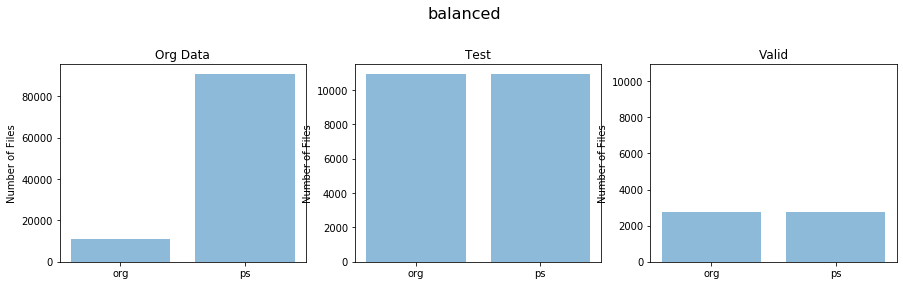

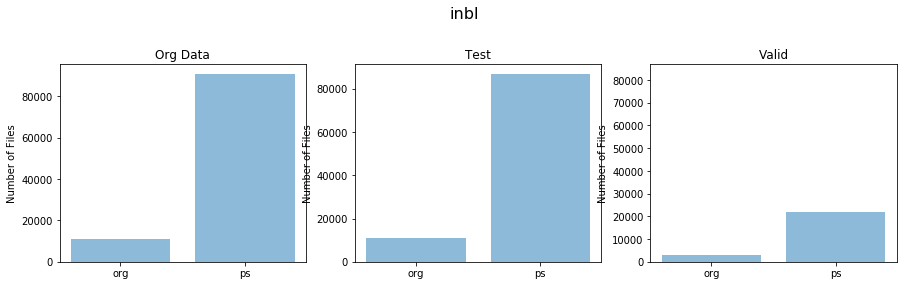

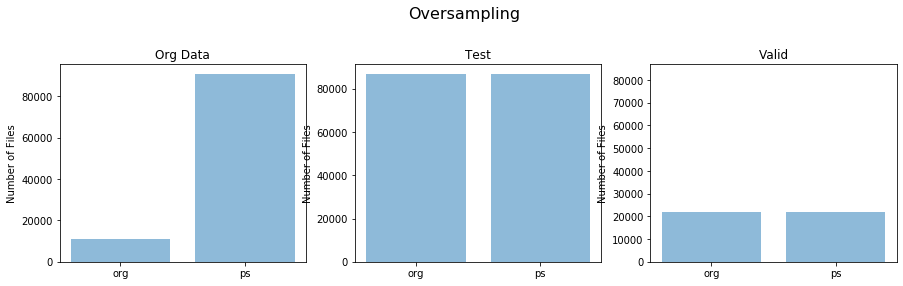

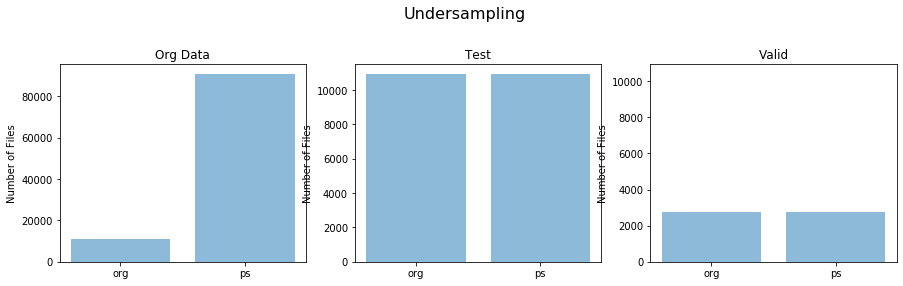

In [14]:
stats()

In [10]:
# clear()

# Model

In [15]:
import numpy as np
import pandas as pd

import cv2

from keras.applications.resnet import ResNet50
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
NUM_CLASSES = 2
CHANNELS = 3

IMAGE_RESIZE = 224
DENSE_LAYER_ACTIVATION = 'softmax'
LOSS_METRICS = ['accuracy']

NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

BATCH_SIZE_TRAINING = 32
BATCH_SIZE_VALIDATION = 32

BATCH_SIZE_TESTING = 1

In [20]:
def exper1(top, pool, opt, loss, dataGen, pathFile):
    out = []
    print(f'MODEL with:')
    print(f'\tinclude_top: {top}')
    print(f'\tpooling: {pool}')
    print(f'\toptimizer: {opt}')
    print(f'\tloss_func: {loss}')
    print(f'\tdata_gen: {dataGen}')
    
    # Model
    model = Sequential()
    model.add(ResNet50(include_top = top, pooling = pool, weights = 'imagenet'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))
    model.layers[0].trainable = False
    model.summary()
    model.compile(optimizer = opt, loss = loss, metrics = LOSS_METRICS)
    
    # Data Gen
    image_size = IMAGE_RESIZE
    if dataGen:
        data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
    else:
        data_generator = ImageDataGenerator(
            shear_range=10,
            zoom_range=0.2,
            horizontal_flip=True,
            preprocessing_function=preprocess_input
        )
    
    # Data
    path = pathFile
    slash = '\\'
    train_generator = data_generator.flow_from_directory(
        directory=path + slash + 'test' + slash,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

    validation_generator = data_generator.flow_from_directory(
        directory=path + slash + 'valid'+ slash,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 
    
    # Callbacks
    cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
    cb_checkpointer = ModelCheckpoint(filepath = '..' + slash + 'working' + slash + 'best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')
    
    # Fit
    fit_history = model.fit_generator(
        generator=train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
    )
    model.load_weights('..' + slash + 'working' + slash + 'best.hdf5')
    name = 'MyData_Top_' + str(top) + '_Pool_' + pool + '_Opt_' + opt + '_Loss_' + loss + '_dataGen_' + str(dataGen)
    model.save('..' + slash + 'working' + slash + name + '.h5')
    
    # Score v1
    scoreRes = model.evaluate_generator(
        generator=validation_generator
    )
    print(f'Accuracy = {scoreRes}')
    tmp = {}
    tmp[name] = scoreRes
    out.append(tmp)
    
    # Score v2
    plt.figure(1, figsize = (15,8)) 
    plt.subplot(221)  
    plt.plot(fit_history.history['accuracy'])  
    plt.plot(fit_history.history['val_accuracy'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 
    plt.subplot(222)  
    plt.plot(fit_history.history['loss'])  
    plt.plot(fit_history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'valid']) 
    plt.show()
    
    # Show some predictions
    test_generator = data_generator.flow_from_directory(
        directory = path + slash + 'show' + slash,
        target_size = (image_size, image_size),
        batch_size = BATCH_SIZE_TESTING,
        class_mode = None,
        shuffle = False,
        seed = 123
    )
    test_generator.reset()
    pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)
    predicted_class_indices = np.argmax(pred, axis = 1)
    TEST_DIR = path + slash + 'show' + slash
    f, ax = plt.subplots(5, 5, figsize = (15, 15))
    for i in range(0,25):
        imgBGR = cv2.imread(TEST_DIR + test_generator.filenames[i])
        imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
        # a if condition else b
        predicted_class = "Dog" if predicted_class_indices[i] else "Cat"
        ax[i//5, i%5].imshow(imgRGB)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("Predicted:{}".format(predicted_class))    
    plt.show()
    
    # End
    print('---KONIEC---')

# Var + exp2 func

In [21]:
path = 'D:\\Studia\\MGU\\Data\\photos'

slash = '/' if os.name != 'nt' else '\\'

folders = ['balanced', 'inbl', 'Oversampling', 'Undersampling']

def exp2(pth):
    exper1(False, 'avg', 'sgd', 'categorical_crossentropy', True, pth)
#     exper1(False, 'avg', 'sgd', 'mean_squared_error', True, pth)
#     exper1(False, 'avg', 'adam', 'mean_squared_error', True, pth)
#     exper1(False, 'avg', 'adam', 'categorical_crossentropy', True, pth)
#     exper1(False, 'avg', 'adadelta', 'categorical_crossentropy', True, pth)

In [22]:
for folder in folders:
    pathFile = path + slash + folder
    exp2(pth=pathFile)

MODEL with:
	include_top: False
	pooling: avg
	optimizer: sgd
	loss_func: categorical_crossentropy
	data_gen: True
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_____

KeyboardInterrupt: 